<a href="https://colab.research.google.com/github/HarshGujarathi7/Data-Science-in-Finance--Independent-Study/blob/main/Insurance_claim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INSURANCE CLAIM FRAUD PROJECT

## The dataset for Insurance claim is also a real world collected data by Indian Institute of Management Calcutta College

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import os, zipfile
import geopandas as gpd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import plotly.graph_objects as go
!matplotlib inline

/bin/bash: line 1: matplotlib: command not found


In [2]:
! wget -q -O usa.zip https://github.com/HarshGujarathi7/Data-Science-in-Finance--Independent-Study/raw/refs/heads/main/Data/National_Obesity_By_State-shp.zip
zip_ref = zipfile.ZipFile('usa.zip', 'r'); zip_ref.extractall(); zip_ref.close()
usa_shp = gpd.read_file('National_Obesity_By_State.shp')

<Axes: >

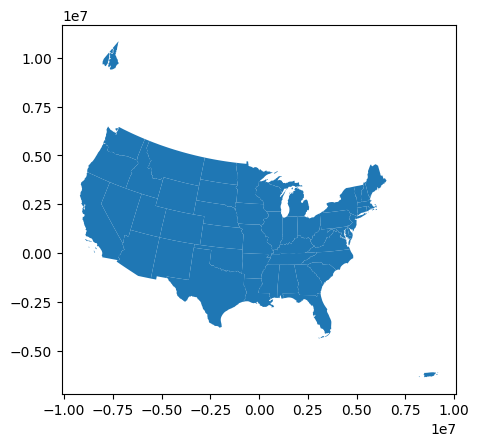

In [3]:
usa_shp.plot()

In [4]:
us_state_abbrev = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS',
    'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA',
    'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT',
    'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM',
    'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
    'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT',
    'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
}

usa_shp['State Abbrev'] = usa_shp['NAME'].map(us_state_abbrev)

In [5]:
! wget -q -O insurance.csv https://drive.google.com/uc?id=1PsDs9byDmvMXNUaFvQrMO3t4ZqPbTMX9&export=download
! wget -q -O poverty.csv https://drive.google.com/uc?id=1ArjguuKEMQvU6s04Kvp-Q9p0mpRWbkku&export=download
! wget -q -O unemployement.csv https://drive.google.com/uc?id=18PpIdKM5yFJ7A0Hj6JOeR-LTvAeF_VYs&export=download
! wget -q -O OH_poverty.csv https://drive.google.com/uc?id=1Fu_tVSVOs_tYqRdG1ycHnajc9sFAcGkZ&export=download
! wget -q -O IN_poverty.csv https://drive.google.com/uc?id=1CWg37QF97zpFDbEN3SIQOWG0wTqQL7F2&export=download
! wget -q -O IL_poverty.csv https://drive.google.com/uc?id=181HG4XdUfkDbUqSrpM9G55lnJEy57fEV&export=download

In [6]:
insurance_fraud = pd.read_csv('insurance.csv')
poverty_rate = pd.read_csv('poverty.csv', skiprows=[1])
unemployement_rate = pd.read_csv('unemployement.csv', skiprows=[1])
OH_poverty = pd.read_csv('OH_poverty.csv', skiprows=[1])
IN_poverty = pd.read_csv('IN_poverty.csv', skiprows=[1])
IL_poverty = pd.read_csv('IL_poverty.csv', skiprows=[1])
insurance_fraud1 = insurance_fraud.copy()

In [7]:
insurance_fraud.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [8]:
insurance_fraud.shape

(1000, 39)

In [9]:
insurance_fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [10]:
insurance_fraud=insurance_fraud.replace('?',np.NaN)

In [11]:
insurance_fraud.isnull().sum()

,0
months_as_customer,0
age,0
policy_number,0
policy_bind_date,0
policy_state,0
policy_csl,0
policy_deductable,0
policy_annual_premium,0
umbrella_limit,0
insured_zip,0


In [12]:
insurance_fraud['collision_type'].fillna(insurance_fraud['collision_type'].mode()[0],inplace=True)
insurance_fraud['property_damage'].fillna(insurance_fraud['property_damage'].mode()[0], inplace = True)
insurance_fraud['police_report_available'].fillna(insurance_fraud['police_report_available'].mode()[0], inplace = True)
insurance_fraud['authorities_contacted'].fillna(insurance_fraud['authorities_contacted'].mode()[0], inplace = True)

<ipython-input-12-630bf78f2c28>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  insurance_fraud['collision_type'].fillna(insurance_fraud['collision_type'].mode()[0],inplace=True)
<ipython-input-12-630bf78f2c28>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doi

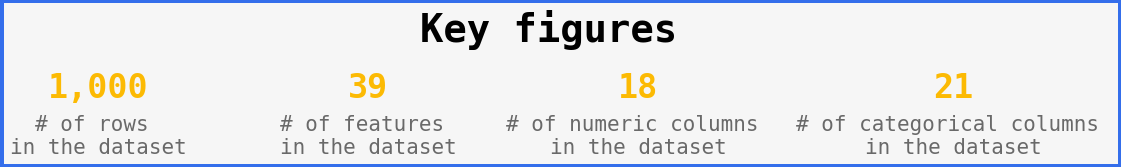

In [13]:
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
df_dtypes = insurance_fraud.dtypes.value_counts()

fig = plt.figure(figsize=(5,2),facecolor='white')

ax = fig.add_subplot(1,1,1)
font = 'monospace'
ax.text(1, 0.8, "Key figures",color='black',fontsize=28, fontweight='bold', fontfamily=font, ha='center')

ax.text(0, 0.4, "{:,d}".format(insurance_fraud.shape[0]), color='#fcba03', fontsize=24, fontweight='bold', fontfamily=font, ha='center')
ax.text(0, 0.001, "# of rows \nin the dataset",color='dimgrey',fontsize=15, fontweight='light', fontfamily=font,ha='center')

ax.text(0.6, 0.4, "{}".format(insurance_fraud.shape[1]), color='#fcba03', fontsize=24, fontweight='bold', fontfamily=font, ha='center')
ax.text(0.6, 0.001, "# of features \nin the dataset",color='dimgrey',fontsize=15, fontweight='light', fontfamily=font,ha='center')

ax.text(1.2, 0.4, "{}".format(len(insurance_fraud.select_dtypes(np.number).columns)), color='#fcba03', fontsize=24, fontweight='bold', fontfamily=font, ha='center')
ax.text(1.2, 0.001, "# of numeric columns \nin the dataset",color='dimgrey',fontsize=15, fontweight='light', fontfamily=font, ha='center')

ax.text(1.9, 0.4,"{}".format(len(insurance_fraud.select_dtypes(object).columns)), color='#fcba03', fontsize=24, fontweight='bold', fontfamily=font, ha='center')
ax.text(1.9, 0.001,"# of categorical columns \nin the dataset",color='dimgrey',fontsize=15, fontweight='light', fontfamily=font,ha='center')

ax.set_yticklabels('')
ax.tick_params(axis='y',length=0)
ax.tick_params(axis='x',length=0)
ax.set_xticklabels('')

for direction in ['top','right','left','bottom']:
    ax.spines[direction].set_visible(False)

fig.subplots_adjust(top=0.9, bottom=0.2, left=0, hspace=1)

fig.patch.set_linewidth(5)
fig.patch.set_edgecolor('#346eeb')
fig.patch.set_facecolor('#f6f6f6')
ax.set_facecolor('#f6f6f6')

plt.show()

In [14]:
label_encoder = LabelEncoder()
insurance_fraud['fraud_reported'] = label_encoder.fit_transform(insurance_fraud['fraud_reported'])

In [15]:
insurance_fraud['policy_age'] = (pd.to_datetime(insurance_fraud['incident_date']) - pd.to_datetime(insurance_fraud['policy_bind_date'])).dt.days
insurance_fraud['vehicle_age'] = 2024 - insurance_fraud['auto_year']

redundant_features = ['policy_bind_date', 'incident_date', 'auto_year','policy_number']
insurance_fraud.drop(columns=redundant_features, inplace=True)

In [16]:
continuous_vars = ['policy_annual_premium', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'policy_age', 'vehicle_age']
scaler = StandardScaler()
insurance_fraud[continuous_vars] = scaler.fit_transform(insurance_fraud[continuous_vars])

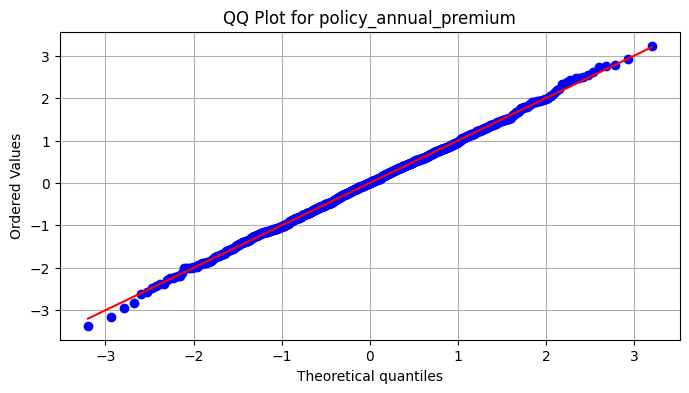

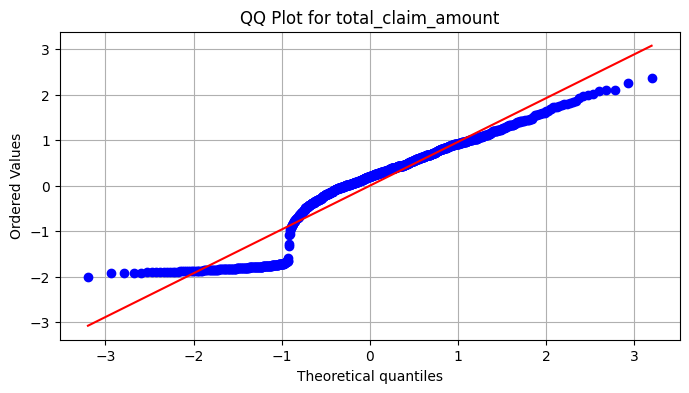

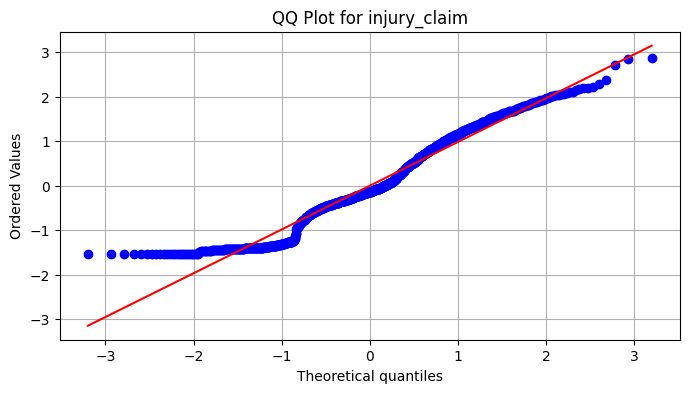

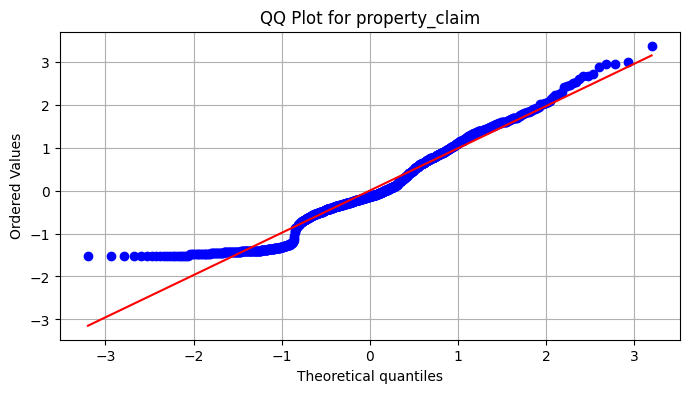

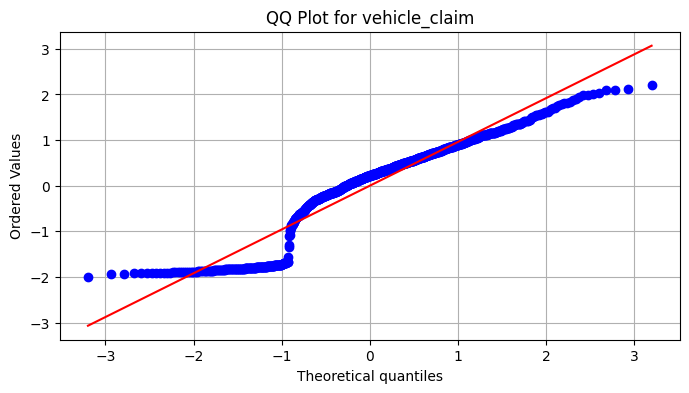

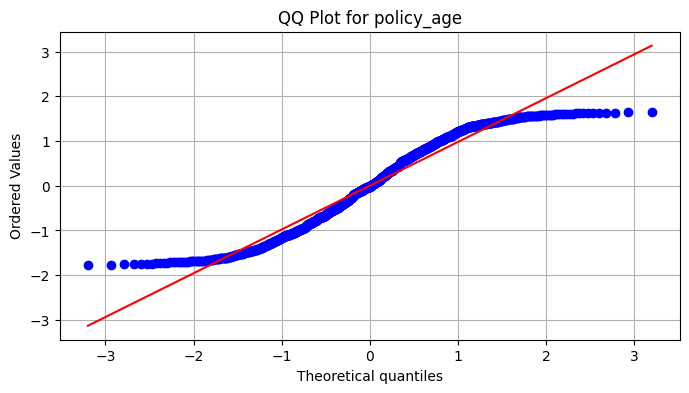

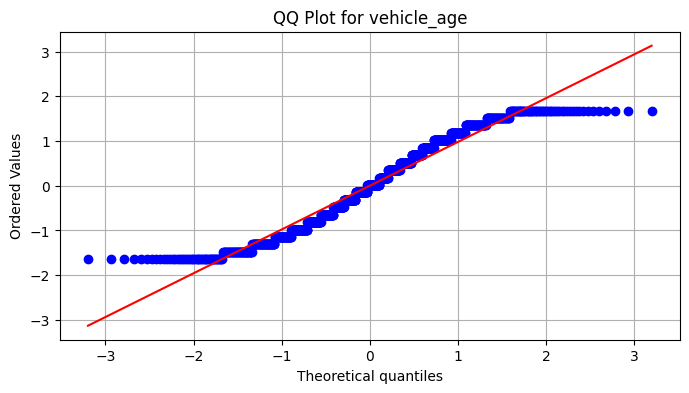

In [17]:
import scipy.stats as stats

def plot_qq(df, columns):
    for column in columns:
        plt.figure(figsize=(8, 4))
        stats.probplot(df[column], dist="norm", plot=plt)
        plt.title(f'QQ Plot for {column}')
        plt.grid()
        plt.show()

continuous_vars = ['policy_annual_premium', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'policy_age', 'vehicle_age']
plot_qq(insurance_fraud, continuous_vars)

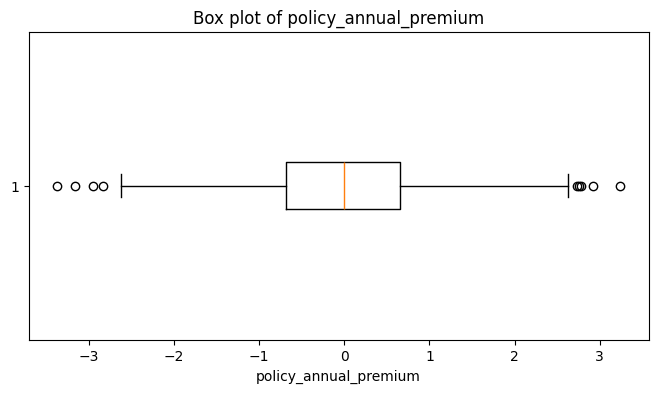

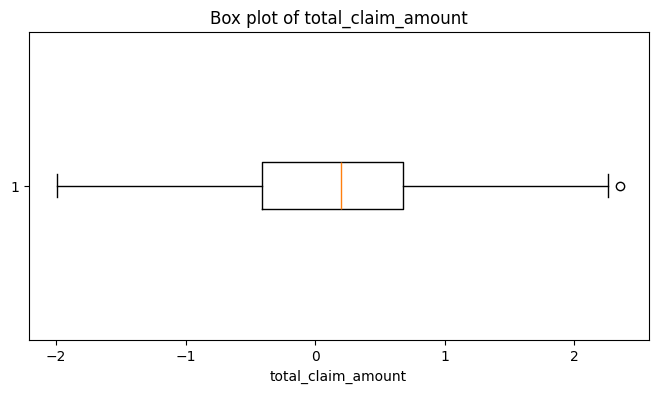

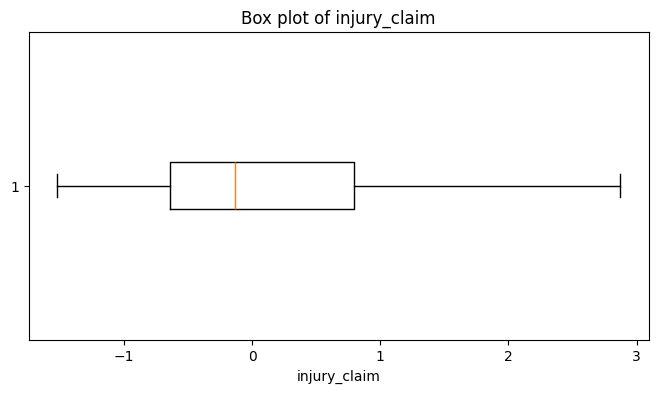

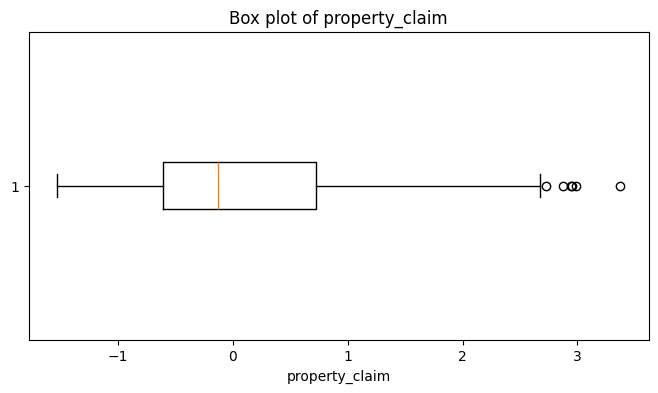

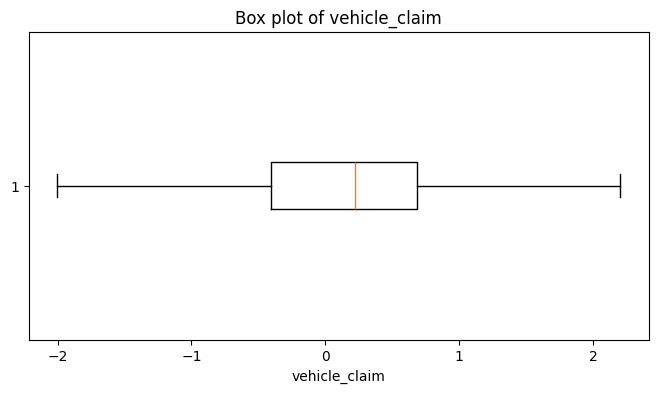

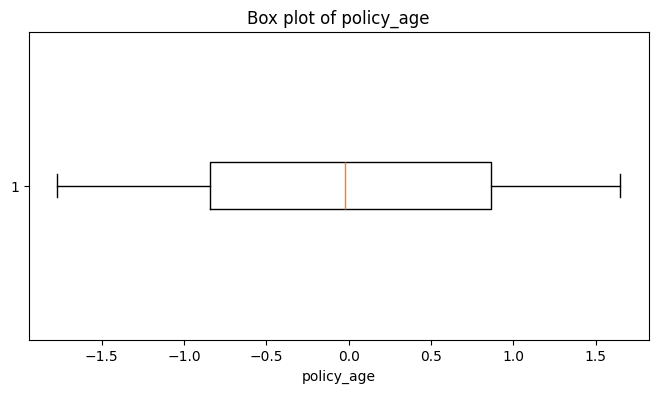

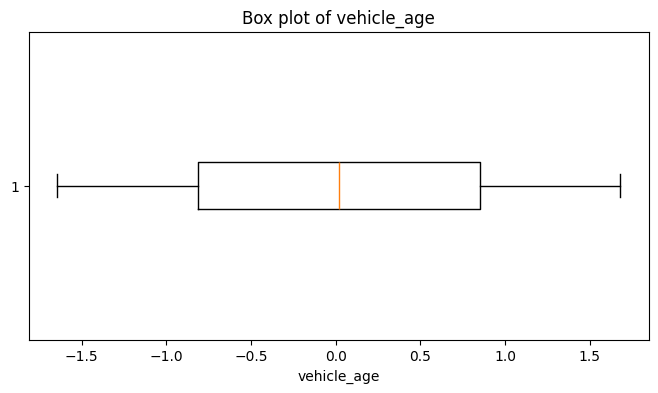

In [18]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
continuous_vars = ['policy_annual_premium', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'policy_age', 'vehicle_age']

for column in continuous_vars:
    plt.figure(figsize=(8, 4))
    plt.boxplot(insurance_fraud[column], vert=False)
    plt.title(f'Box plot of {column}')
    plt.xlabel(column)
    plt.show()
for column in continuous_vars:
    insurance_fraud = remove_outliers_iqr(insurance_fraud, column)

In [19]:
insurance_fraud.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,policy_age,vehicle_age
0,328,48,OH,250/500,1000,0.616705,0,466132,MALE,MD,...,YES,0.714257,-0.189283,1.165505,0.749653,Saab,92x,1,-1.727743,0.183440
1,228,42,IN,250/500,2000,-0.242521,5000000,468176,MALE,MD,...,NO,-1.807312,-1.363822,-1.372696,-1.823346,Mercedes,E400,1,-0.599288,-0.315491
2,134,29,OH,100/300,2000,0.642233,5000000,430632,FEMALE,PhD,...,NO,-0.686362,0.054644,-0.736072,-0.785565,Dodge,RAM,0,0.202176,-0.315491
3,256,41,IL,250/500,2000,0.652886,6000000,608117,FEMALE,PhD,...,NO,0.403135,-0.224130,-0.219722,0.677607,Chevrolet,Tahoe,1,1.585371,-1.479664
4,228,44,IL,500/1000,1000,1.341980,6000000,610706,MALE,Associate,...,NO,-1.753121,-1.257232,-1.399654,-1.768252,Accura,RSX,0,-1.669644,-0.648112


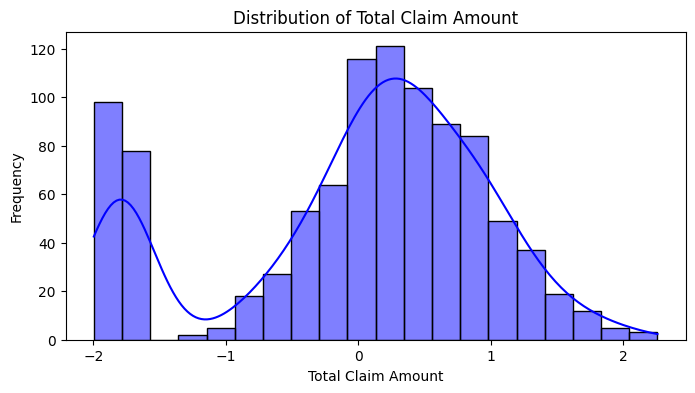

In [20]:
plt.figure(figsize=(8, 4))
sns.histplot(insurance_fraud['total_claim_amount'], kde=True, color="blue")
plt.title('Distribution of Total Claim Amount')
plt.xlabel('Total Claim Amount')
plt.ylabel('Frequency')
plt.show()

### This histogram displays the distribution of Total Claim Amount, showing a nearly normal distribution with some skewness. Most claims are concentrated around the mean, but there are visible lower and higher extreme values that could be potential outliers or cases worth further investigation.

In [21]:
fig = px.scatter(insurance_fraud, x='age', y='total_claim_amount', color='fraud_reported',
                 title="Age vs Total Claim Amount", labels={'fraud_reported': 'Fraud Reported'})
fig.update_layout(xaxis_title="Age", yaxis_title="Total Claim Amount", template="plotly_dark")
fig.show()

### This scatter plot visualizes the relationship between Age and Total Claim Amount, with points color-coded based on whether fraud was reported (1 = yellow, 0 = blue). There doesn't appear to be a strong correlation between age and claim amounts, but fraudulent claims seem more evenly distributed across various ages and claim amounts, warranting deeper investigation into other factors influencing fraud

In [22]:
fig = px.pie(insurance_fraud, names='fraud_reported', title='Fraud Reported Proportion', hole=0.4)
fig.update_traces(textinfo='percent+label')
fig.show()

<ipython-input-23-394a909aeda5>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




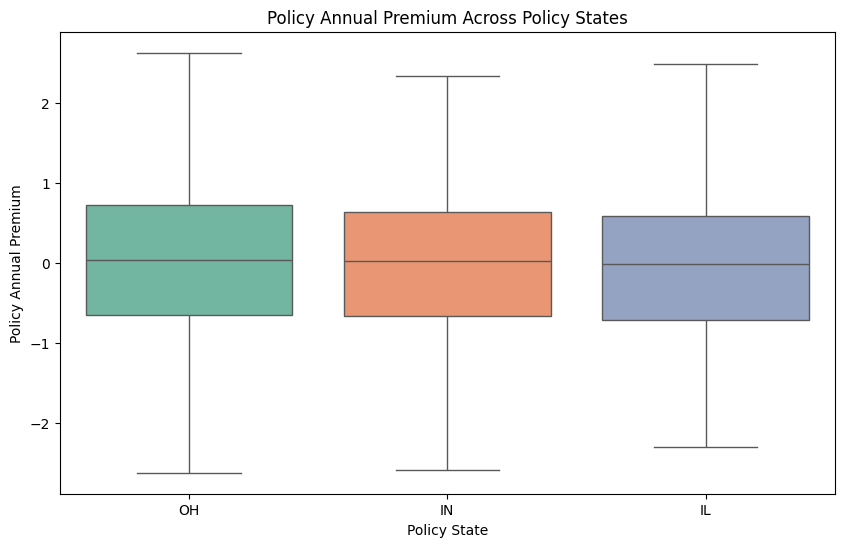

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=insurance_fraud, x='policy_state', y='policy_annual_premium', palette='Set2')
plt.title('Policy Annual Premium Across Policy States')
plt.xlabel('Policy State')
plt.ylabel('Policy Annual Premium')
plt.show()

### This boxplot compares the Policy Annual Premium across different Policy States (OH, IN, IL). The median premiums appear similar across all states, with a slight variation in the interquartile range (IQR). OH has slightly broader variability in premiums, while IL shows a narrower spread. This suggests that while premiums are consistent across states, some outliers or regional factors might influence the broader range in OH.

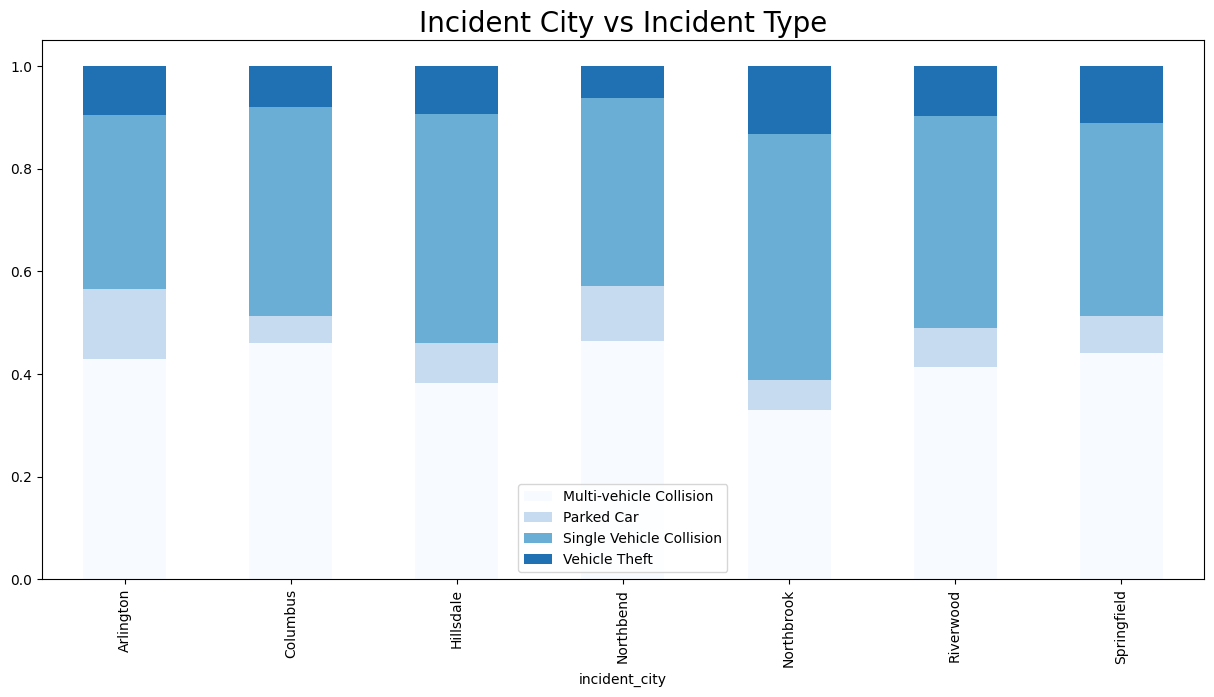

In [24]:
incident=pd.crosstab(insurance_fraud['incident_city'], insurance_fraud['incident_type'])
colors = plt.cm.Blues(np.linspace(0, 1, 5))
incident.div(incident.sum(1).astype(float), axis = 0).plot(kind = 'bar',
                                                           stacked = True,
                                                           figsize = (15, 7),
                                                           color = colors)

plt.title('Incident City vs Incident Type', fontsize = 20)
plt.legend()
plt.show()

### This stacked bar chart shows the distribution of Incident Severity across different Incident Types. Multi-vehicle collisions tend to result in higher proportions of major damage and total loss, while incidents like parked car and vehicle theft are more likely to result in minor damage or trivial damage, indicating varying severity based on incident type

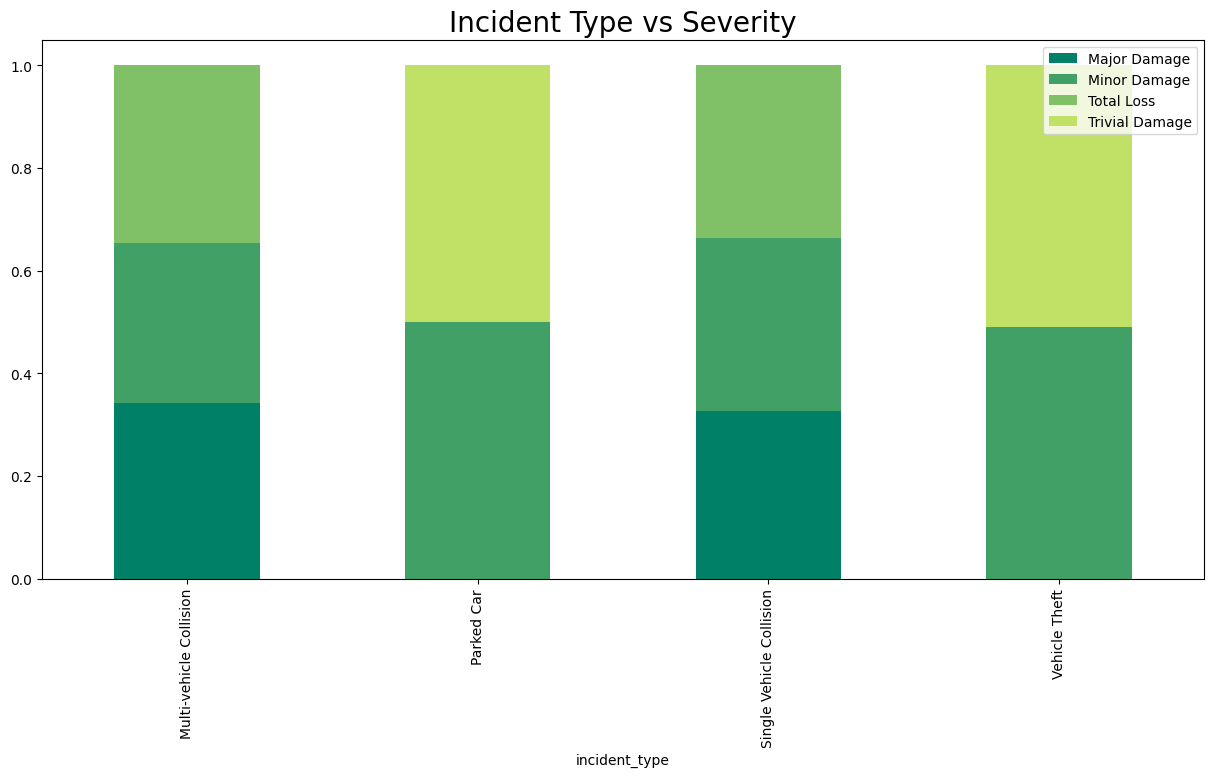

In [25]:
incident = pd.crosstab(insurance_fraud['incident_type'], insurance_fraud['incident_severity'])
colors = plt.cm.summer(np.linspace(0, 1, 5))
incident.div(incident.sum(1).astype(float), axis = 0).plot(kind = 'bar',
                                                           stacked = True,
                                                           figsize = (15, 7),
                                                           color = colors)

plt.title('Incident Type vs Severity', fontsize = 20)
plt.legend()
plt.show()

### This stacked bar chart compares the severity levels of incidents across different Incident Types. Insights reveal that multi-vehicle collisions and single-vehicle collisions have a higher proportion of major damage, while parked car incidents and vehicle theft predominantly result in trivial or minor damage. This highlights that collision-related incidents are typically more severe than theft or parked car damage

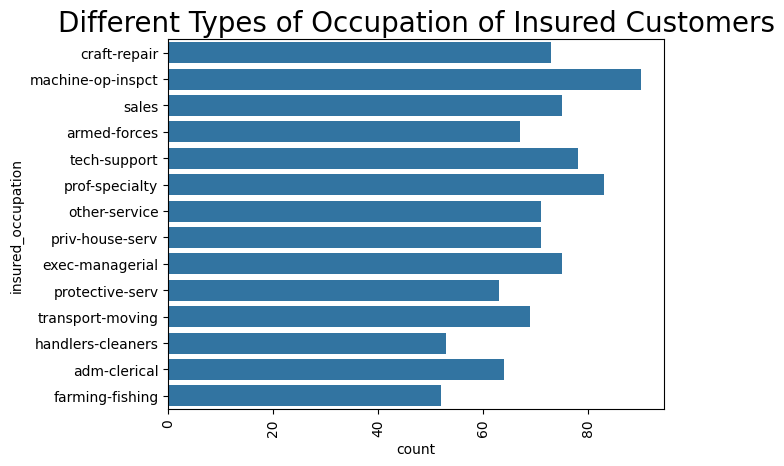

In [26]:
sns.countplot(insurance_fraud['insured_occupation'])
plt.title('Different Types of Occupation of Insured Customers', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

### The bar chart shows that the most common occupations among insured customers are exec-managerial, machine-op-inspect, and adm-clerical, while professions like armed-forces and priv-house-serv are less represented. This distribution highlights the diversity in the insured population's professional background

###

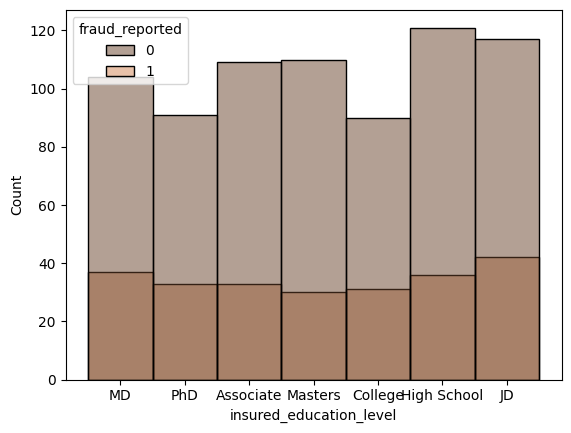

In [27]:
sns.histplot(insurance_fraud,x='insured_education_level', palette = 'copper',hue='fraud_reported')
plt.show()

### This bar chart displays the relationship between insured_education_level and fraud_reported. Fraud reports are relatively consistent across education levels, with a slightly higher count for individuals with a High School education. This suggests that education level alone may not be a strong determinant of fraud but is worth exploring in combination with other factors

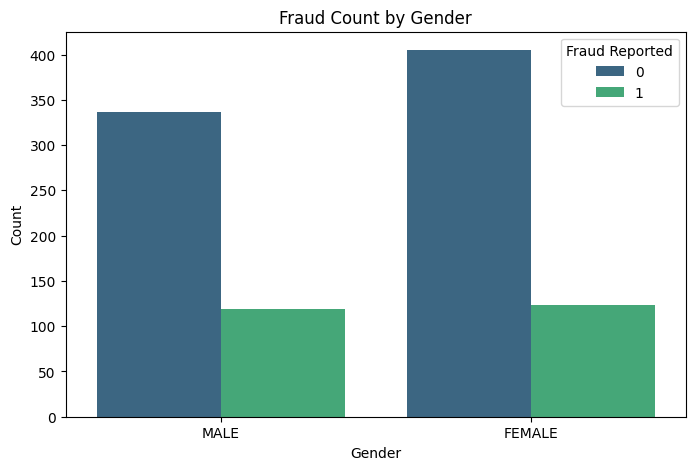

In [28]:
plt.figure(figsize=(8, 5))
sns.countplot(data=insurance_fraud, x='insured_sex', hue='fraud_reported', palette='viridis')
plt.title('Fraud Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Fraud Reported', loc='upper right')
plt.show()

### This bar chart displays the fraud counts by gender. Fraud is reported at a similar rate for both males and females, with non-fraud cases significantly outnumbering fraud cases in both groups. This suggests gender does not have a strong influence on the likelihood of fraud

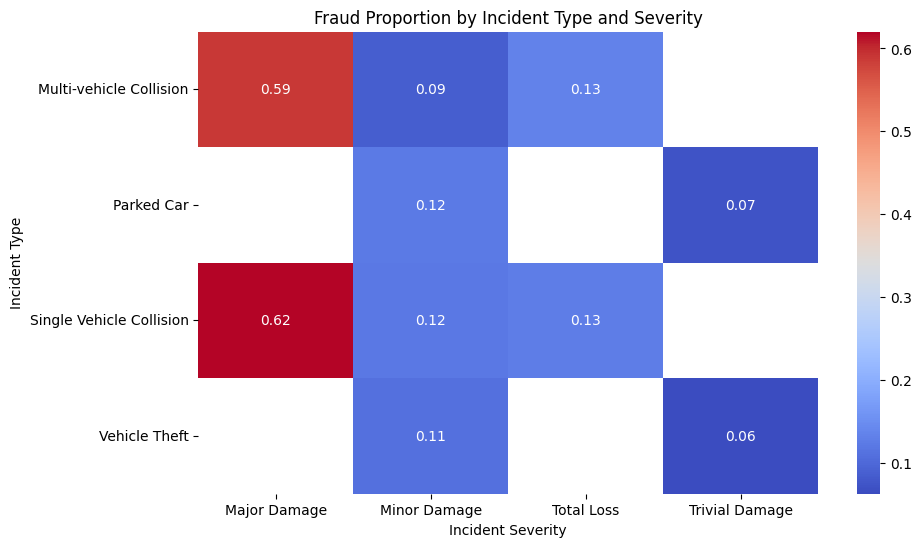

In [29]:
fraud_pivot = insurance_fraud.pivot_table(values='fraud_reported',
                                          index='incident_type',
                                          columns='incident_severity',
                                          aggfunc='mean')

plt.figure(figsize=(10, 6))
sns.heatmap(fraud_pivot, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Fraud Proportion by Incident Type and Severity')
plt.xlabel('Incident Severity')
plt.ylabel('Incident Type')
plt.show()


### This heatmap shows the proportion of fraud reported for different combinations of Incident Type and Incident Severity. Single-vehicle collisions and multi-vehicle collisions with major damage have the highest fraud proportions (0.62 and 0.59, respectively). In contrast, incidents with trivial damage across all types have the lowest fraud proportions, indicating that fraud likelihood increases with severity and complexity of incidents

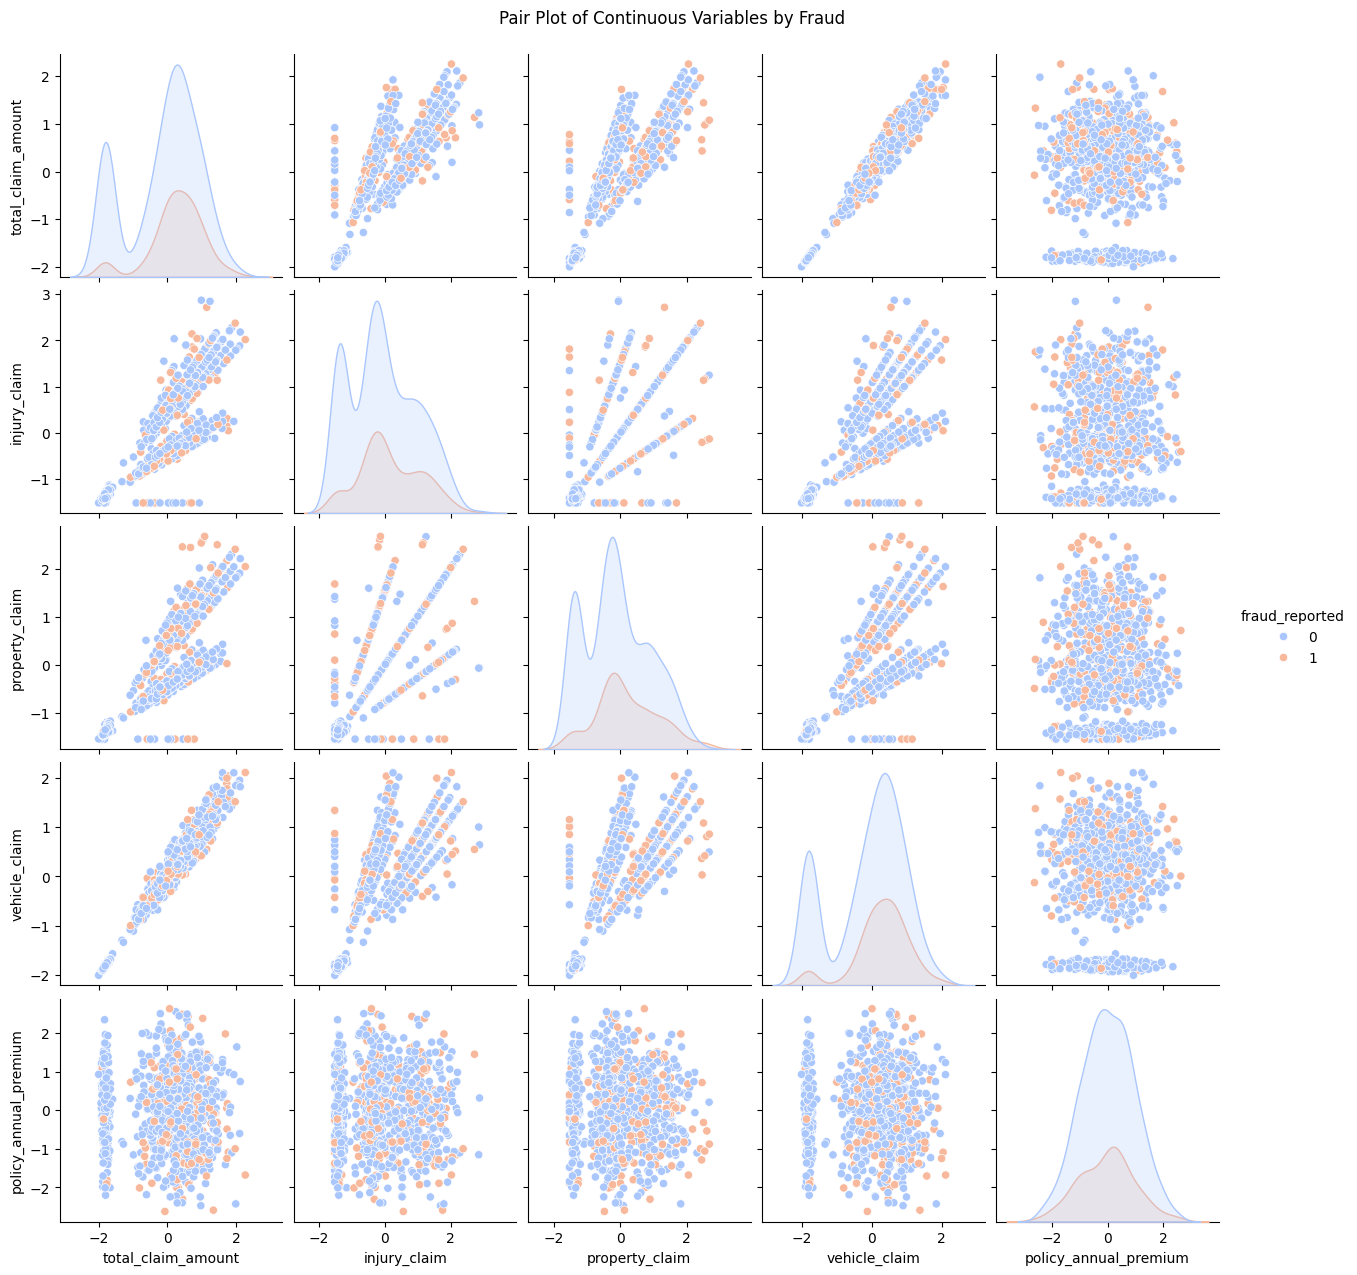

In [30]:
continuous_vars = ['total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'policy_annual_premium']

sns.pairplot(insurance_fraud, vars=continuous_vars, hue='fraud_reported', palette='coolwarm', diag_kind='kde')
plt.suptitle('Pair Plot of Continuous Variables by Fraud', y=1.02)
plt.show()

### Strong Positive Correlations:

### Variables like injury_claim, property_claim, and vehicle_claim are highly correlated with total_claim_amount, indicating they are major contributors to the total claim.
### Fraud Distribution:

### raud (orange points) is more concentrated in higher claim values across multiple variables, suggesting that larger claims are more likely to be flagged as fraudulent.

In [31]:
# Normalize 'policy_annual_premium' to non-negative values
insurance_fraud['policy_annual_premium_normalized'] = (insurance_fraud['policy_annual_premium'] -
                                                       insurance_fraud['policy_annual_premium'].min()) + 1

# Scatter plot with normalized size
fig = px.scatter(insurance_fraud,
                 x='age',
                 y='total_claim_amount',
                 size='policy_annual_premium_normalized',
                 color='fraud_reported',
                 title='Bubble Plot: Age vs Total Claim Amount (Bubble = Policy Premium)',
                 labels={'fraud_reported': 'Fraud Reported'})
fig.show()


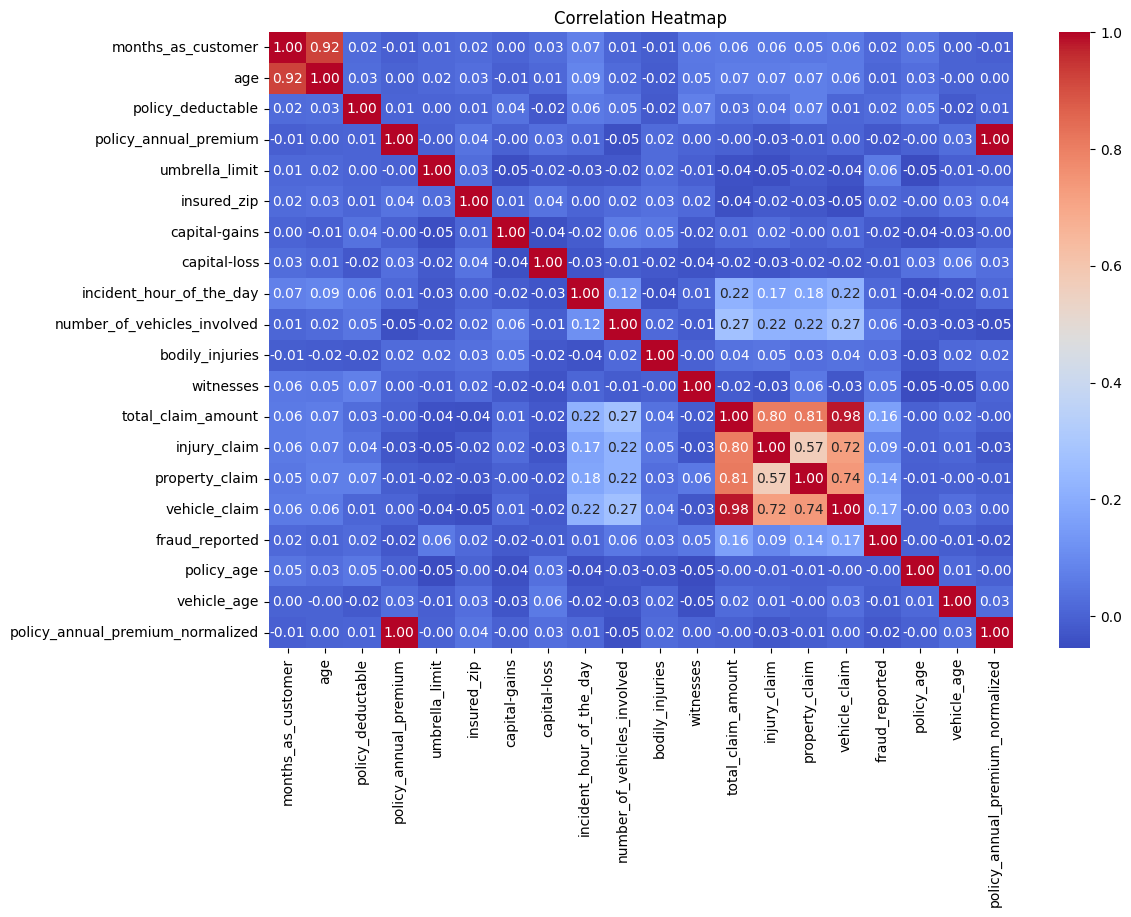

In [32]:
numeric_columns = insurance_fraud.select_dtypes(include=['int64', 'float64']).columns

corr = insurance_fraud[numeric_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title('Correlation Heatmap')
plt.show()

In [33]:
poverty_rate.columns

Index(['Geography Type Description', 'Geography Name', 'Sits in State',
       'GeoID', 'Formatted GeoID', 'Percent of People in Poverty',
       'Data Time Period', 'Geographic Vintage', 'Data Source',
       'Selected Location'],
      dtype='object')

In [34]:
merged_poverty_usashp=  usa_shp.merge(poverty_rate, left_on='State Abbrev',right_on = 'Sits in State', how='left')

In [35]:
merged_poverty_usashp.head()

,FID,NAME,Obesity,SHAPE_Leng,SHAPE_Area,geometry,State Abbrev,Geography Type Description,Geography Name,Sits in State,GeoID,Formatted GeoID,Percent of People in Poverty,Data Time Period,Geographic Vintage,Data Source,Selected Location
0,1,Texas,32.4,1.540832e+07,7.672329e+12,"POLYGON ((-4733454.413 -1236806.965, -4731845....",TX,State,Texas,TX,48.0,"=""48""",17.35,2008-2012,NaN,Census,United States
1,2,California,24.2,1.451870e+07,5.327809e+12,"MULTIPOLYGON (((-8404411.041 284710.501, -8366...",CA,State,California,CA,6.0,"=""06""",15.28,2008-2012,NaN,Census,United States
2,3,Kentucky,34.6,6.346699e+06,1.128830e+12,"POLYGON ((628609.492 -31311.293, 647687.562 -3...",KY,State,Kentucky,KY,21.0,"=""21""",18.56,2008-2012,NaN,Census,United States
3,4,Georgia,30.7,5.795596e+06,1.652980e+12,"POLYGON ((1801578.384 -601112.983, 1840793.866...",GA,State,Georgia,GA,13.0,"=""13""",17.41,2008-2012,NaN,Census,United States
4,5,Wisconsin,30.7,6.806782e+06,1.567816e+12,"MULTIPOLYGON (((1343492.25 3192768.205, 136859...",WI,State,Wisconsin,WI,55.0,"=""55""",12.48,2008-2012,NaN,Census,United States


In [49]:
fraud_counts = insurance_fraud.groupby('incident_state')['fraud_reported'].sum().reset_index(name='Fraud Count')


  incident_state  Fraud Count
0             NC           34
1             NY           57
2             OH           10
3             PA            8
4             SC           71
5             VA           24
6             WV           38
